# Tarea Cápsula #2: *Representation Learning*

### EL7024 - Teoría de la Información: Fundamentos y Aplicaciones 
### Information and Decision Systems Group

Nombre: José Matamoros Morris

## Preguntas Teóricas:

### P1) Inferencia Variacional

a) A partir del funcional objetivo de Inferencia Variacional $KL(q(\mathbf{z})||p(\mathbf{z}|\mathbf{x}))$ encuentre una cota inferior para el logaritmo de la **evidencia** $log p(x)$ y muestre que esta se puede escribir como:

\begin{equation}
\begin{split}
ELBO(q) &= \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})}\{\log{p(\mathbf{x},\mathbf{z})}\} - \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})}\{\log{q(\mathbf{z})}\} \\
&= \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})}\{\log{p(\mathbf{x}|\mathbf{z})}\} - KL(q(\mathbf{z})||p(\mathbf{z}))
\end{split}
\end{equation}

b) Explique e interprete la forma de la *Evidence Lower Bound*. En este sentido puede resultarle más fácil considerar la segunda expresión $ELBO(q) = \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})}\{\log{p(\mathbf{x}|\mathbf{z})}\} - KL(q(\mathbf{z})||p(\mathbf{z}))$.

**Hint**: Puede resultarle útil pensar en lo siguiente: ¿Para qué valores de $\mathbf{z}$ o bajo qué criterio cada término de este funcional propicia la asignación de masa en $q(\mathbf{z})$?

c) Explique brevemente por qué los problemas de optimización $\underset{q(\mathbf{z}) \in \mathcal{Q}}{\operatorname{arg min}} KL(q(\mathbf{z})||p(\mathbf{z}|\mathbf{x}))$ y $\underset{q(\mathbf{z}) \in \mathcal{Q}}{\operatorname{arg max}} ELBO(q)$ son equivalentes.

### P2) Information Bottleneck Profundo

En el mismo estilo que estudiamos para los *Autoencoders* Variacionales deduciremos la forma de definir una función de pérdida adecuada para abordar el problema del *Information Bottleneck* por medio de redes neuronales. Para esto, primero reescribimos el problema de la siguiente manera:

\begin{equation}
    \underset{p(\mathbf{z}|\mathbf{x}), p(\mathbf{y}|\mathbf{z})}{\operatorname{max}} R_{IB} = I(\mathbf{Y};\mathbf{Z}) - \beta I(\mathbf{X};\mathbf{Z})
\end{equation}

de modo tal que deduciremos una cota inferior del funcional, siendo $\mathbf{Z}$ la variable latente que comprime la señal de entrada $\mathbf{X}$ y se utiliza en la predicción de $\mathbf{Y}$, y es tal que $\mathbf{Z} - \mathbf{X} - \mathbf{Y}$.

a) Consideremos primero una cota inferior para $I(\mathbf{Y};\mathbf{Z})$. Considerando que $q(\mathbf{y}|\mathbf{z})$ es una aproximación variacional del *decoder* $p(\mathbf{y}|\mathbf{z})$ y el supuesto de Markovianidad demuestre que:

\begin{equation}
    I(\mathbf{Y};\mathbf{Z}) \geq \int_{\mathcal{X}}\int_{\mathcal{Z}}\int_{\mathcal{Y}}p(z|x)p(y|x)p(x)\log q(y|z) dydzdx = \tilde{I}(\mathbf{Y};\mathbf{Z})
\end{equation}

b) Para el término $I(\mathbf{X};\mathbf{Z})$ es necesaria una cota superior. Demuestre que una aproximación variacional $r(\mathbf{z})$ del *prior* $p(\mathbf{z})$ satisface que:

\begin{equation}
    I(\mathbf{X};\mathbf{Z}) \leq \int_{\mathcal{X}}\int_{\mathcal{Z}}\int_{\mathcal{Y}}p(z|x)p(y|x)p(x)\log \frac{p(z|x)}{r(z)} dydzdx = \tilde{I}(\mathbf{X};\mathbf{Z})
\end{equation}

Definamos la cota resultante para $R_{IB}$ por

\begin{equation}
    \mathcal{L}_{IB} = \tilde{I}(\mathbf{Y};\mathbf{Z}) - \beta \tilde{I}(\mathbf{X};\mathbf{Z})
\end{equation}

c) Empleando la distribución conjunta empírica $\tilde{p}(x,y) = \frac{1}{N}\sum_{i=1}^{N}\delta_{x^{(i)}}(x)\delta_{y^{(i)}}(y)$ deduzca que

\begin{equation}
    \mathcal{L}_{IB} \approx \frac{1}{N}\sum_{i=1}^{N}\left[ \mathbb{E}_{\mathbf{Z} \sim p(\mathbf{z}|\mathbf{x})} \left\{ \log q(\mathbf{y}^{(i)}|\mathbf{z}) \right\} - \beta KL\left( p(\mathbf{z}|\mathbf{x}^{(i)}) || r(\mathbf{z}) \right)\right]
\end{equation}

## Preguntas de Simulación:

En esta parte de la tarea deberán implementar y probar el modelo deducido en la pregunta 2 mediante redes neuronales, donde se considera que las aproximaciones variacionales están parametrizadas por una red correspondiente al *encoder* $p_{\theta}(\mathbf{z}|\mathbf{x})$ y otra para el *decoder* $q_{\phi}(\mathbf{y}|\mathbf{z})$, es decir que el funcional a **minimizar** corresponde a:

\begin{equation}
    \begin{split}
        \mathcal{L}'_{IB}(\phi, \theta) &= -\frac{1}{N}\sum_{i=1}^{N}\left[ \mathbb{E}_{\mathbf{Z} \sim p_{\theta}(\mathbf{z}|\mathbf{x})} \left\{ \log q_{\phi}(\mathbf{y}^{(i)}|\mathbf{z}) \right\} - \beta KL\left( p_\theta(\mathbf{z}|\mathbf{x}^{(i)}) || r(\mathbf{z}) \right)\right] \\
        &= \frac{1}{N}\sum_{i=1}^{N}\left[ \mathbb{E}_{\mathbf{Z} \sim p_{\theta}(\mathbf{z}|\mathbf{x})} \left\{ -\log q_{\phi}(\mathbf{y}^{(i)}|\mathbf{z}) \right\} + \beta KL\left( p_\theta(\mathbf{z}|\mathbf{x}^{(i)}) || r(\mathbf{z}) \right)\right]
    \end{split}
\end{equation}

Los experimentos se realizarán sobre el *dataset* MNIST en el problema de **clasificación**.

Como parámetro $L$ de muestreo para aplicar el *Reparametrization Trick* puede utilizar $L=12$. Si usa la función de Pytorch [$\texttt{torch.nn.CrossEntropyLoss}$](https://pytorch.org/docs/master/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) se recomienda revisar el efecto de usar $\texttt{reduction='none'}$.

In [1]:
#%tensorflow_version 1.x
#%load_ext tensorboard

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.distributions as D
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

from copy import deepcopy
from matplotlib import cm
from mpl_toolkits import mplot3d
from torch.utils.data import Dataset, DataLoader, Subset

print(torch.__version__)

1.5.0+cu101


In [3]:
## Batch Sizes
train_batch_size = 100
test_batch_size = 1000

## Train-Val Split
train_dataset_mnist = datasets.MNIST(root='./', train=True, download=True,
                                     transform=transforms.Compose([
                                         transforms.ToTensor()]))

test_dataset_mnist = datasets.MNIST(root='./', train=False, 
                                    transform=transforms.Compose([
                                        transforms.ToTensor()]))

## DataLoaders
train_loader_mnist = torch.utils.data.DataLoader(train_dataset_mnist,
                                                 batch_size = train_batch_size)
test_loader_mnist = torch.utils.data.DataLoader(test_dataset_mnist,
                                                batch_size = test_batch_size)

i) Implemente una clase $\texttt{DeepIB}$ que corresponda a la siguiente arquitectura:

* *Encoder* Gaussiano: Red *fully-connected* $784\to1024\to1024\to2K$, donde K es la dimensionalidad de la variable latente. Los primeros $K$ valores de dicha capa corresponderán a $\mu_{\mathbf{z}}(\mathbf{x})$ y las siguientes $K$ componentes comprenden las desviaciones estándar $\sigma_{\mathbf{z}}(\mathbf{x})$. Entre cada capa debe usar la función de activación $\texttt{ReLU}$.
**Hint**: Para asegurar que las desviaciones estándar $\sigma_{\mathbf{z}}(\mathbf{x})$ sean positivas se recomienda aplicarles la siguiente transformación: 

\begin{equation}
    \sigma_{\mathbf{z}}(\mathbf{x}) = \log (1 + \exp (\sigma_{\mathbf{z}}^{raw}(\mathbf{x}) - 5.0)),
\end{equation}

$\hspace{7mm}$ donde $\sigma_{\mathbf{z}}^{raw}(\mathbf{x})$ denota a la desviación estándar antes de aplicar esta transformación.

* *Decoder*: Red *fully-connected* $K\to10$. Considere que este decoder es determinístico.

Para la Función de Costo considere $r(\mathbf{z}) = \mathcal{N}(\mathbf{z};0,I)$ (es decir que requiere una expresión cerrada para el término de divergencia).

**Hint**: Dado que el *decoder* es determinístico, puede usar la función de *Cross-Entropy* para el primer término, en forma astuta.

In [4]:
class DeepIB(nn.Module):
  def __init__(self, zDim, sampling = 1):
    super(DeepIB, self).__init__()
    self.sampling = sampling
    ## Encoder 784->1024->1024->(K,K)
    self.encoder_x = nn.Sequential(nn.Linear(784, 1024), nn.ReLU(),
                                   nn.Linear(1024,1024), nn.ReLU())
    self.encoder_mu = nn.Linear(1024, zDim)         
    self.encoder_logvar = nn.Linear(1024, zDim)                               
    ## Decoder K -> 10
    self.decode_z = nn.Linear(zDim, 10)

  def encode(self, x):
    x = self.encoder_x(x)
    mu_z = self.encoder_mu(x)
    logvar_z = self.encoder_logvar(x)
    return mu_z, logvar_z

  def reparametrize(self, mu_z, logvar_z):
    L = self.sampling
    sigma_z = torch.exp(0.5*logvar_z)
    if not self.training:
      L = 1
    epsilon = torch.randn(list(mu_z.shape)+[L]).cuda()
    mu_z = mu_z.view(list(mu_z.shape)+[1])
    sigma_z = sigma_z.view(list(sigma_z.shape)+[1])
    z = mu_z + sigma_z * epsilon 
    z_ = z.permute(0,2,1)
    return z_

  def forward(self, x):
    mu_z, logvar_z = self.encode(x)
    z = self.reparametrize(mu_z, logvar_z)
    y = self.decode_z(z)
    return y

  def DeepIB_Loss(self, y_predict, target, beta ,mu_z, logvar_z, sampling=1):
    L = sampling         ## Number of samples to take for each value x
    var_z = torch.exp(0.5*logvar_z)
    
    #Cross entropy
    y_predict = y_predict.sum(axis = 1)
    cross_entropy = nn.CrossEntropyLoss(reduction="none")(y_predict, target)
    
    #Divergencia
    divergence = 1 + torch.log(var_z) - (mu_z**2) - var_z
    divergence = 0.5*divergence.sum(axis=-1).reshape(-1)   ## Get rid of "extra" dimension

    Nterm = cross_entropy - beta*divergence
    loss = Nterm.mean()

    y_predict = np.argmax(y_predict.clone().detach().cpu().numpy(), axis=1)
    acc = np.sum(np.equal(y_predict,target.clone().detach().cpu().numpy()))

    return loss, acc

ii) Implemente una clase $\texttt{MLP}$ correspondiente a la arquitectura $784\to1024\to1024\to K\to10$ para un mismo valor de $K$ que en el caso de $\texttt{DeepIB}$. Al ser un problema de clasificación puede entrenar con *Cross-Entropy*.

In [5]:
class MLP(nn.Module):
    def __init__(self, zDim, sampling=1):
        super(MLP, self).__init__()
        self.sampling = sampling
        self.mlp = nn.Sequential(nn.Linear(784,1024), nn.ReLU(),
                                 nn.Linear(1024,1024), nn.ReLU(),
                                 nn.Linear(1024,zDim), nn.ReLU(),
                                 nn.Linear(zDim,10), nn.ReLU())
        
    def forward(self, x):
        y = self.mlp(x)
        return y
    
    def MLP_loss(self, y_predict, y, sampling=1):
      L = self.sampling
      #Cross entropy
      cross_entropy = nn.CrossEntropyLoss(reduction="none")(y_predict, y)
      loss = cross_entropy.mean()
      
      y_predict = np.argmax(y_predict.clone().detach().cpu().numpy(), axis=1)
      acc = np.sum(np.equal(y_predict,y.clone().detach().cpu().numpy()))

      return loss, acc

iii) Para $K=2$ y $\beta \in \{10^{-3}, 10^{-1},1\}$, entrene ambos modelos considerando un *loop* de entrenamiento similar al de la Cápsula 2, de tal modo que el *learning rate* del optimizador Adam decaiga en $97\%$ cada $2$ épocas.

In [7]:
lr0 = 10e-4
beta1 = 0.5
beta2 = 0.999 
lr_decay = 0.97
decay_rate = 2
nEpochs = 50

deepIB_train_ac = np.zeros((3,nEpochs))
deepIB_test_ac = np.zeros((3,nEpochs))

zDim = 2
betas = [0.001, 0.1, 1]
models = [DeepIB(zDim= zDim, sampling = 12).cuda(),
          DeepIB(zDim= zDim, sampling = 12).cuda(),
          DeepIB(zDim= zDim, sampling = 12).cuda()]
for k in range(len(betas)):
  beta = betas[k]
  print("Entrenando para beta = "+str(beta))
  model = models[k]
  #print(model)
  optimizer = torch.optim.Adam(model.parameters(), lr0, (beta1, beta2))
  train_accuracy = []
  test_accuracy = []
  model.train()
  for epoch in range(nEpochs):
    corrects_train = 0
    for i, (x_b, y_b) in enumerate(train_loader_mnist):
      x_b = x_b.reshape(train_batch_size, -1).cuda()
      y_b = y_b.cuda()         
      y_p = model.forward(x_b)
      optimizer.zero_grad()  

      mu_z, logvar_z = model.encode(x_b)
      loss, acc = model.DeepIB_Loss(y_p, y_b, beta, mu_z, logvar_z, sampling=model.sampling)

      acc = acc/len(train_loader_mnist)
      corrects_train += acc
      loss.backward()
      optimizer.step()

    corrects_test = 0
    for i, (x_bb, y_bb) in enumerate(test_loader_mnist):
      x_bb = x_bb.reshape(test_batch_size, -1).cuda()
      y_bb = y_bb.cuda()         
      y_p_test = model.forward(x_bb)
      mu_z, logvar_z = model.encode(x_bb)
      test_loss, test_acc = model.DeepIB_Loss(y_p_test, y_bb, beta, mu_z, logvar_z, sampling=model.sampling)
      test_acc = test_acc/(10*len(test_loader_mnist))
      corrects_test += test_acc

    train_accuracy.append(corrects_train)
    test_accuracy.append(corrects_test)
    if epoch==0:
      print('Epoch : {} || Loss : {:.3f} || Train acc: {:.3f} || Test acc: {:.3f}'.format(epoch + 1, loss, corrects_train, corrects_test))
    
    if (epoch+1) % 5 == 0:
      print('Epoch : {} || Loss : {:.3f} || Train acc: {:.3f} || Test acc: {:.3f}'.format(epoch + 1, loss, corrects_train, corrects_test))

    if epoch % decay_rate == 1:
      optimizer.param_groups[0]['lr'] *= lr_decay

  model.eval()
  save_PATH = './deep_IB_%s.pth'%(k)
  torch.save(model.state_dict(), save_PATH)
  deepIB_train_ac[k,:] = np.array(train_accuracy)
  deepIB_test_ac[k,:] = np.array(test_accuracy)

Entrenando para beta = 0.001
Epoch : 1 || Loss : 0.255 || Train acc: 81.740 || Test acc: 89.160
Epoch : 5 || Loss : 0.271 || Train acc: 97.830 || Test acc: 96.060
Epoch : 10 || Loss : 0.143 || Train acc: 99.003 || Test acc: 96.950
Epoch : 15 || Loss : 0.077 || Train acc: 99.470 || Test acc: 96.550
Epoch : 20 || Loss : 0.014 || Train acc: 99.752 || Test acc: 97.470
Epoch : 25 || Loss : 0.010 || Train acc: 99.753 || Test acc: 97.410
Epoch : 30 || Loss : 0.012 || Train acc: 99.842 || Test acc: 97.490
Epoch : 35 || Loss : 0.011 || Train acc: 99.852 || Test acc: 97.420
Epoch : 40 || Loss : 0.010 || Train acc: 99.938 || Test acc: 97.450
Epoch : 45 || Loss : 0.009 || Train acc: 99.918 || Test acc: 97.520
Epoch : 50 || Loss : 0.006 || Train acc: 99.802 || Test acc: 97.310
Entrenando para beta = 0.1
Epoch : 1 || Loss : 0.576 || Train acc: 74.467 || Test acc: 88.260
Epoch : 5 || Loss : 0.312 || Train acc: 97.863 || Test acc: 96.040
Epoch : 10 || Loss : 0.251 || Train acc: 98.868 || Test acc: 96.

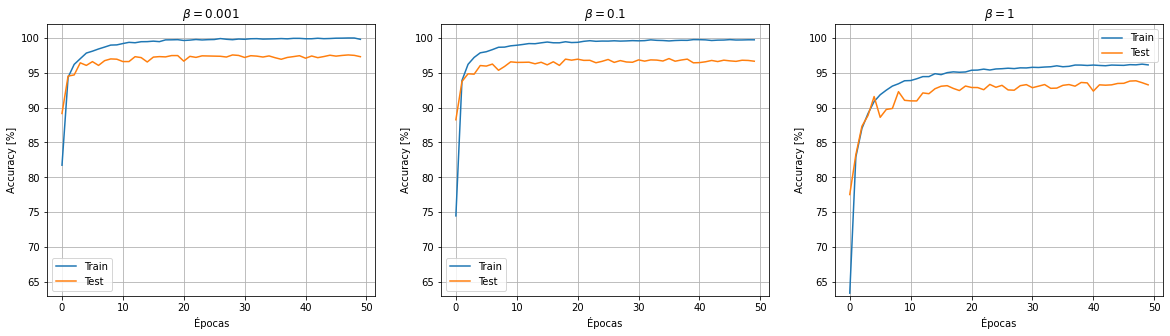

In [15]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1,3, figsize=(20,5))
for i in range(3):
  ax[i].plot(deepIB_train_ac[i,:],c='C0', label='Train')
  ax[i].plot(deepIB_test_ac[i,:], c='C1', label='Test')
  ax[i].set_xlabel('Épocas')
  ax[i].set_ylabel('Accuracy [%]')
  ax[i].set_ylim((63,102))
  ax[i].set_title(r'$\beta=$%s'%(betas[i]))
  ax[i].legend()
  ax[i].grid()

In [16]:
lr0 = 10e-4
beta1 = 0.5
beta2 = 0.999 
lr_decay = 0.97
decay_rate = 2
nEpochs = 50

zDim = 2

model = MLP(zDim= zDim, sampling = 12).cuda()
optimizer = torch.optim.Adam(model.parameters(), lr0, (beta1, beta2))
train_accuracy = []
test_accuracy = []
model.train()
for epoch in range(nEpochs):
  corrects_train = 0
  for i, (x_b, y_b) in enumerate(train_loader_mnist):
    x_b = x_b.reshape(train_batch_size, -1).cuda()
    y_b = y_b.cuda()         
    y_p = model.forward(x_b)
    optimizer.zero_grad()  
    loss, acc = model.MLP_loss(y_p, y_b, sampling=model.sampling)
    acc = acc/len(train_loader_mnist)
    corrects_train += acc
    loss.backward()
    optimizer.step()

  corrects_test = 0
  for i, (x_bb, y_bb) in enumerate(test_loader_mnist):
    x_bb = x_bb.reshape(test_batch_size, -1).cuda()
    y_bb = y_bb.cuda()         
    y_p_test = model.forward(x_bb)
    test_loss, test_acc = model.MLP_loss(y_p_test, y_bb, sampling=model.sampling)
    test_acc = test_acc/(10*len(test_loader_mnist))
    corrects_test += test_acc

  train_accuracy.append(corrects_train)
  test_accuracy.append(corrects_test)
  if epoch==0:
    print('Epoch : {} || Loss : {:.3f} || Train acc: {:.3f} || Test acc: {:.3f}'.format(epoch + 1, loss, corrects_train, corrects_test))
    
  if (epoch+1) % 5 == 0:
    print('Epoch : {} || Loss : {:.3f} || Train acc: {:.3f} || Test acc: {:.3f}'.format(epoch + 1, loss, corrects_train, corrects_test))

  if epoch % decay_rate == 1:
    optimizer.param_groups[0]['lr'] *= lr_decay

model.eval()
save_PATH = './MLP.pth'
torch.save(model.state_dict(), save_PATH)
mlp_train_ac = np.array(train_accuracy)
mlp_test_ac = np.array(test_accuracy)

Epoch : 1 || Loss : 1.424 || Train acc: 49.340 || Test acc: 67.000
Epoch : 5 || Loss : 0.647 || Train acc: 78.548 || Test acc: 78.240
Epoch : 10 || Loss : 0.573 || Train acc: 79.403 || Test acc: 78.510
Epoch : 15 || Loss : 0.470 || Train acc: 79.705 || Test acc: 78.520
Epoch : 20 || Loss : 0.465 || Train acc: 79.872 || Test acc: 78.880
Epoch : 25 || Loss : 0.463 || Train acc: 79.868 || Test acc: 78.780
Epoch : 30 || Loss : 0.461 || Train acc: 80.050 || Test acc: 78.890
Epoch : 35 || Loss : 0.461 || Train acc: 80.103 || Test acc: 78.770
Epoch : 40 || Loss : 0.461 || Train acc: 80.170 || Test acc: 79.050
Epoch : 45 || Loss : 0.466 || Train acc: 79.957 || Test acc: 78.840
Epoch : 50 || Loss : 0.461 || Train acc: 80.230 || Test acc: 79.010


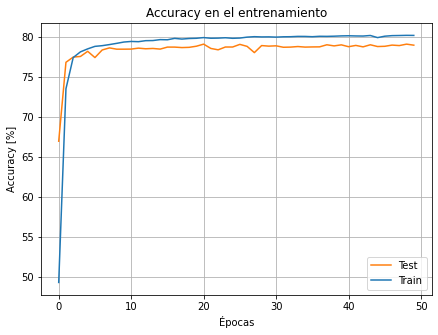

In [20]:
f, ax = plt.subplots(1,1, figsize=(7,5))
ax.plot(mlp_test_ac, c='C1', label='Test')
ax.plot(mlp_train_ac, c='C0', label='Train')
ax.set_xlabel('Épocas')
ax.set_ylabel('Accuracy [%]')
#ax.set_ylim((63,102))
ax.set_title('Accuracy en el entrenamiento')
ax.legend()
ax.grid()

Compare y analice la *accuracy* obtenida por los modelos estocásticos obtenidos entre sí y con el modelo $\texttt{MLP}$ clásico.


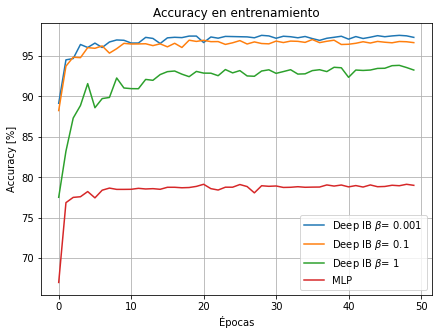

In [24]:
f, ax = plt.subplots(1,1, figsize=(7,5))
for i in range(3):
  ax.plot(deepIB_test_ac[i,:], c='C%s'%(i), label='Deep IB '+r'$\beta$= '+str(betas[i]))
  
ax.plot(mlp_test_ac,c='C3', label='MLP')
ax.set_xlabel('Épocas')
ax.set_ylabel('Accuracy [%]')
ax.set_title('Accuracy en entrenamiento')
ax.legend()
ax.grid()

Además, para los modelos estocásticos, obtenga la proyección de los datos de prueba en el espacio latente $K$-dimensional y analice el efecto de $\beta$ en este resultado.

In [27]:
test_loader_mnist_1 = torch.utils.data.DataLoader(test_dataset_mnist, batch_size = 1)
Z = []
Y = []
for k in range(3):
  z = []
  y = []
  for i, (x_bb, y_bb) in enumerate(test_loader_mnist_1):
    x_bb = x_bb.reshape(1, -1).cuda()         
    mu_z_1, logvar_z_1 = models[k].encode(x_bb)
    z_1 = models[k].reparametrize(mu_z_1, logvar_z_1)
    z_1 = z_1.sum(axis=1)
    z_1 = z_1.clone().detach().cpu().numpy()
    y_bb = y_bb.clone().detach().cpu().numpy() #labels
    z.append(z_1)
    y.append(y_bb)

  z = np.array(z)
  y = np.array(y)
  Z.append(z)
  Y.append(y)

Z = np.array(Z)
Y = np.array(Y)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


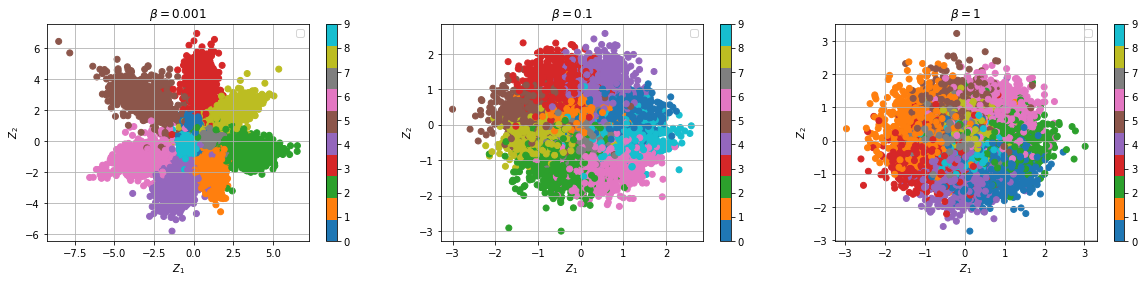

In [28]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1,3, figsize=(20,4))
for i in range(3):
  colors = Y[i,:,0]
  plot_ax = ax[i].scatter(Z[i,:,0,0],Z[i,:,0,1], c = colors, cmap='tab10')
  ax[i].set_xlabel(r'$Z_1$')
  ax[i].set_ylabel(r'$Z_2$')
  ax[i].set_title(r'$\beta=$%s'%(betas[i]))
  plt.colorbar(plot_ax, ax=ax[i])
  ax[i].legend()
  ax[i].grid()
